# Programs
The programs below shows the iterations of our code trying to implement the PDF in the form of Python Code.

### Linear Probability Density Function
This is the Linear Implementation in Python of the **Probability Density Function** in a Python Function.

In [522]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def linearPDF(mean: float, std_dev: float, plotGraph: bool = True):
    # Generate a range of x values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

    # Calculate the corresponding PDF values
    y = norm.pdf(x, mean, std_dev)

    # Plot the PDF
    if plotGraph:
        plt.plot(x, y)
        plt.title('Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('Probability Density')
        plt.show()

# Example usage: plot_pdf(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")))

### Two-Dimensional Probability Density Function
This function presents the PDF in a two-dimensional form with available parameters: `mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d`
> Parameters `a`, `b`, `c`, and `d` cannot be 0 as it would be invalid to calculate

In [523]:
import numpy as np
from scipy.stats import multivariate_normal

def twodimPDF(mu_x: float, mu_y: float, sigma_x: float, sigma_y: float, rho: float, a: float, b: float, c: float, d: float, plotGraph: bool = True):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Get Scale Absolute value
    graphLength: float = max([abs(mu_x + b),abs(mu_x - a),abs(mu_x + a),abs(mu_x - b),abs(mu_y + c),abs(mu_y + d),abs(mu_y - c),abs(mu_y - d)])

    # Create a grid of points
    x = y = np.linspace(0, graphLength, 100) # For Unifying the plot graph X and Y axis scales (0 to calculated scale)
    norm_x, norm_y = np.linspace(mu_x - a, mu_x + b, 100), np.linspace(mu_y - c, mu_y + d, 100) # Calculates actual linear spaces

    X, Y = np.meshgrid(norm_x, norm_y) # Plots mesh grid slots according to actual linear

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance, allow_singular=True)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Plot the PDF
    if plotGraph:
        plt.figure(figsize=(8, 6))
        plt.contourf(x, y, pdf, cmap='viridis') # Draws plot graph according to the calculated scale on both axis
        plt.colorbar()
        plt.title('2D Gaussian Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return pdf

# Example Usage: twodimPDF(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")), float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

We can use both functions and execute the following: (Example Cases: __0, 50, 1, 1, 0, 10, 10, 10, 10__)

In [524]:
# mu_x, mu_y = float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: "))
# 
# linearPDF(mu_x, mu_y)
# twodimPDF(mu_x, mu_y, float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

### The Quadratic Drag Coefficient Equation
The equation here presents this equation: $C_{\mathrm{D}}$ = $C \left({\pi \rho E d_{c}^{2} \over 32 \mu^{2}}\right)^{1/3} \mathrm{Re}^{-2/3}$

- $C_{\mathrm{D}}$ is the drag coefficient
- $C$ is a constant
- $\rho$ is the fluid density
- $E$ is the Young's modulus
- $d_c$ is the filament diameter
- $\mu$ is the dynamic viscosity
- $\mathrm{Re}$ is the Reynolds number

**Example Figures 1 (Non-Fact-Validated)**
- C = 12 (dimensionless constant)
- rho = 1.2 kg/m^3 (fluid density of air)
- E = 70 GPa (Young's modulus for a polymer filament)
- dc = 100 μm (filament diameter)
- mu = 1.8×10^-5 Pa·s (dynamic viscosity of air)
- Re = 1000 (example Reynolds number)

**Example Figures 2 (Fact-Validated)**
- C = 12 (dimensionless constant)
- rho = 1.204 kg/m^3 (fluid density of air)
- E = 70 GPa (Young's modulus for a polymer filament)
> The Young's Modulus here used could differ from the actual Young's Modulus values for a Dandelion Pappus Filament, as there were no actual figures recorded.
> The similar replacements were Fiberglass Filaments (Standard 10~70 GPa, [Ref. 1](https://omnexus.specialchem.com/polymer-properties/properties/young-modulus)), as they were recorded to be made with similar structure to dandelion pappus filaments ([Ref. 2](https://www.nature.com/articles/s41467-023-38792-z)).
- dc = 1~10 μm (filament diameter of Fiberglass filament, [Ref. 2](https://www.nature.com/articles/s41467-023-38792-z))
- mu = 18.1 MicroPa·s (dynamic viscosity of air, Standard 18.1 MicroPa·s at 15 Degree Celcius and 18.6 MicroPa·s at 25 Degree Celcius, [Ref. 3](https://www.engineersedge.com/physics/viscosity_of_air_dynamic_and_kinematic_14483.htm))
- Re = 1~1000 (example Reynolds number)

The Code below presents a python function that substitutes the values of the equation as the parameters for the function.

In [525]:
import matplotlib.pyplot as plt
import numpy as np

def drag_coefficient_plot(C: float, rho: float, E: float, dc: float, mu: float):
    # Range of Re
    Re_range = np.linspace(1, 1000, 100)
    
    # The equation
    CD = (C * ((np.pi * rho * E * dc**2) / (32 * mu**2))**(1/3)) * Re_range**(-2/3)
    
    # Limits the displaying Y scope of the graph
    plt.ylim(0, 20)
    
    # Plots the graph
    plt.plot(Re_range, CD)
    plt.xlabel('Re')
    plt.ylabel('CD')
    plt.title('Drag Coefficient vs Reynolds Number')
    plt.show()

# C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
# drag_coefficient_plot(C, rho, E, dc, mu)

An example input here:

In [526]:
# C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
# drag_coefficient_plot(C, rho, E, dc, mu)

### Model Visualizing
This is the real stuff. I want to die
I will show here step by step of my mind thinking process.

#### Grids
So, basically, what we have to do right now is to plot out a mesh grid. So, here's a sample code:

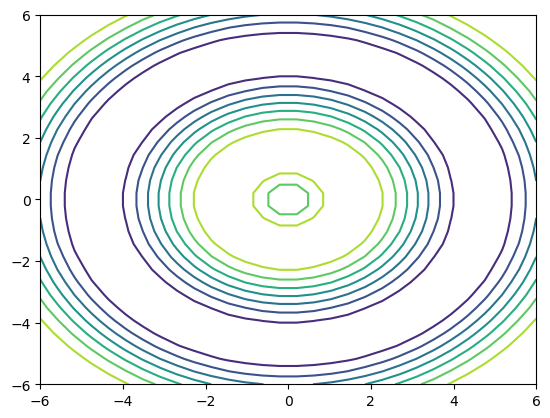

In [527]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

plt.show()

#### Compatibility of PDF in Final Plot
Time for the hard part.
We can't use the PDFunction from previously written code, because that code returns a type that we don't want. So we have to revise the entire function to return as a function that calculates the PDF at a give `(x,y)` point.

In [528]:
def statistical_dimPDF(mu_x: float, mu_y: float, sigma_x: float, sigma_y: float, rho: float, a: float, b: float, c: float, d: float):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Get Scale Absolute value
    graphLength: float = max([abs(mu_x + b),abs(mu_x - a),abs(mu_x + a),abs(mu_x - b),abs(mu_y + c),abs(mu_y + d),abs(mu_y - c),abs(mu_y - d)])

    # Create a grid of points
    x = y = np.linspace(0, graphLength, 100) # For Unifying the plot graph X and Y axis scales (0 to calculated scale)
    norm_x, norm_y = np.linspace(mu_x - a, mu_x + b, 100), np.linspace(mu_y - c, mu_y + d, 100) # Calculates actual linear spaces

    X, Y = np.meshgrid(norm_x, norm_y) # Plots mesh grid slots according to actual linear

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance, allow_singular=True)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Return a function that calculates the PDF at a given point
    return rv.pdf

#### Proper-Chanced Distribution Plotting
In the final results, we have to plot out the distributions for each batch of seed and then the spread pos of each seed in batch. Here's the code.

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

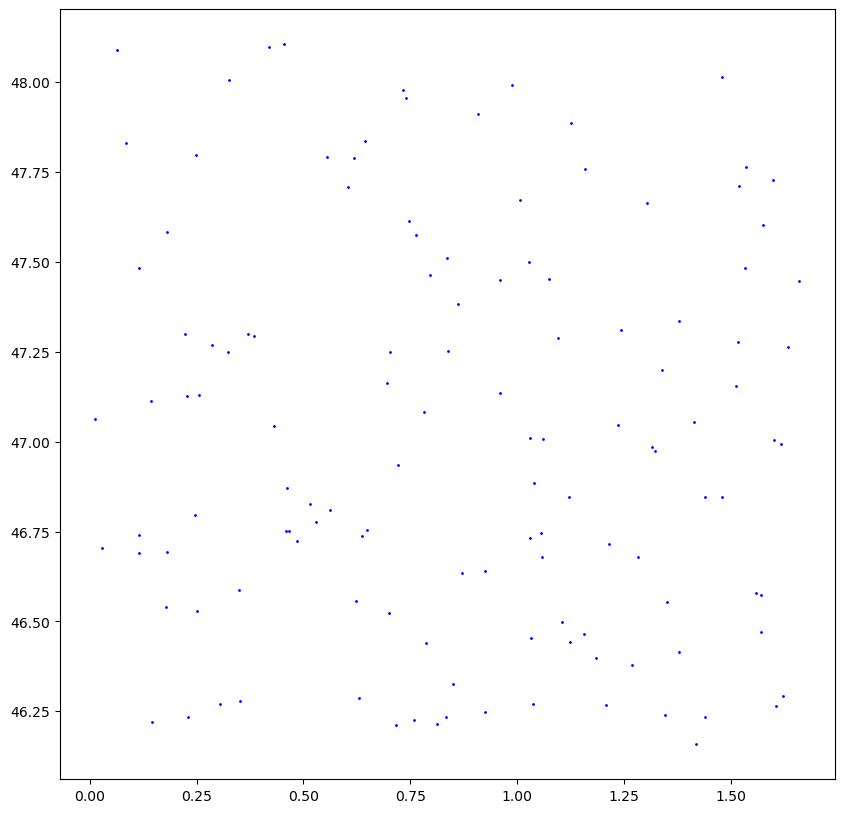

In [529]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
from mpl_toolkits.mplot3d import Axes3D

# # Constants
# n_0 = 175
# V_range = (1, 5)
# a_range = (0, 360)
# theta_range = (0, 360)
# n_range = (0, 20)
# k = 1  # Assuming k=1, you can change it to the value you want
# x_0 = 0
# y_0 = 50

# Function to calculate V_x and V_y
def calculate_velocity(V: float, a: float, theta: float):
    V_x = V * np.sin(np.radians(a)) * np.cos(np.radians(theta))
    V_y = V * np.sin(np.radians(a)) * np.sin(np.radians(theta))
    return V_x, V_y

# Function to calculate landing position
def landing_position(V_x, V_y, t, x_prev, y_prev):
    x_t = V_x * t + x_prev
    y_t = V_y * t + y_prev
    return x_t, y_t

# Function to calculate sigma
def calculate_sigma(V_local, k = 3):
    sigma_1 = k * np.log(abs(V_local[0]))
    sigma_2 = k * np.log(abs(V_local[1]))
    return sigma_1, sigma_2

# Function to generate seeds within the PDF
def generate_seeds(pdf, n: int, x_range, y_range):
    seeds = []
    for _ in range(n):
        while True:
            x = random.uniform(*x_range)
            y = random.uniform(*y_range)
            if pdf([x,y]) > 0.01:
                seeds.append((x, y))
                break
    return seeds

# Function to plot the seeds
def plot_seeds(seeds):
    plt.figure(figsize=(10, 10))
    x_loc, y_loc = zip(*seeds)
    plt.scatter(*zip(*seeds), s=1)
    plt.xlim(0, max(x_loc) + 5) # Shows the limiting graphed range in x-axis
    plt.ylim(min(y_loc) - 5, max(y_loc) + 5) # Shows the limiting graphed range in y-axis
    plt.title("Proper-Chanced Distribution Plot")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

# Function to plot the seeds visualized with probability of position-based distribution
def plot_seeds_probability_distr(seeds, pdf):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_loc, y_loc = zip(*seeds)
    z = [pdf([xi, yi]) for xi, yi in seeds]
    ax.scatter(x_loc, np.array(y_loc), z, s=1)
    ax.set_xlim(0, max(x_loc) + 5) # Shows the limiting graphed range in x-axis
    ax.set_ylim(min(y_loc) - 5, max(y_loc) + 5) # Shows the limiting graphed range in y-axis
    ax.set_zlim(0, max(z)) # Shows the limiting graphed range in z-axis
    ax.set_title("Proper-Chanced Position-Based Probability Distribution Model")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Probability Density")
    plt.show()

# Function to plot all seeds with calculated gaussian distribution probability
def plot_all_seeds(all_seeds):
    plt.figure(figsize=(10, 10))
    for seeds in all_seeds:
        plt.scatter(*zip(*seeds), s=1)
    plt.title('All Individual Seeds within Each Batch')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Main simulation
plt.figure(figsize=(10, 10))
def simulate(rho_1: float, rho_2: float, i_tot: int):
    # Constants
    n_0 = 175
    V_range = (1, 5)
    a_range = (0, 360)
    theta_range = (0, 360)
    k = 1  # Assuming k=1, you can change it to the value you want
    x_prev = 0
    y_prev = 50
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']  # Color for each iteration
    all_seeds = []
    seed_db: list[list[float]] = []

    # Calculate rho_sim for each iteration
    rho_sim: float = rho_1 * rho_2

    # Main simulation
    plt.figure(figsize=(10, 10))
    
    for i in range(int(n_0 * rho_sim)):
        seed_db.append([0,0])
    
    seed_batch: list[list[tuple[float, float]]] = []
    
    def calc_batch_new(seeds_loc: list[tuple[float, float]]):
        batch = []
        for s in seeds_loc:
            a = random.uniform(*a_range)
            theta = random.uniform(*theta_range)
            V = random.uniform(*V_range)
            t = random.uniform(0.2, 5)  # Assuming t is a random value between 0 and 1
    
            # Step 2: Calculate V_x and V_y
            V_x, V_y = calculate_velocity(V, a, theta)
    
            # Step 3: Calculate landing position
            x_t, y_t = landing_position(V_x, V_y, t, s[0], s[1])
    
            # Step 4: Calculate sigma
            sigma_1, sigma_2 = calculate_sigma((V_x, V_y))
    
            # Step 5: Generate a PDF at the landing position
            pdf = statistical_dimPDF(x_t, y_t, sigma_1, sigma_2, rho_sim, 10, 10, 10, 10)
    
            # Step 6: Generate seeds within the PDF
            new_seeds = generate_seeds(pdf, n, (x_t-1, x_t+1), (y_t-1, y_t+1))
            batch.append(new_seeds)
        
        return batch
        
    
    def calc_batch(n: int):
        a = random.uniform(*a_range)
        theta = random.uniform(*theta_range)
        V = random.uniform(*V_range)
        t = random.uniform(0.2, 5)  # Assuming t is a random value between 0 and 1

        # Step 2: Calculate V_x and V_y
        V_x, V_y = calculate_velocity(V, a, theta)

        # Step 3: Calculate landing position
        x_t, y_t = landing_position(V_x, V_y, t, x_prev, y_prev)

        # Step 4: Calculate sigma
        sigma_1, sigma_2 = calculate_sigma((V_x, V_y))

        # Step 5: Generate a PDF at the landing position
        pdf = statistical_dimPDF(x_t, y_t, sigma_1, sigma_2, rho_sim, 10, 10, 10, 10)

        # Step 6: Generate seeds within the PDF
        new_seeds = generate_seeds(pdf, n, (0, x_t+1), (y_t-1, y_t+1))
        return new_seeds
    
    
    for i in range(i_tot):
        n_i: int = int(n_0 * rho_sim)  # Number of seeds that survived in this iteration
        seeds = []
        index = -1
        if index == -1:
            while n_i > 0:
                # Step 1: Generate random values
                n: int = n_i
                seeds.extend(calc_batch(n))
                n_i -= n
        else:
            seed_batch.append(calc_batch_new(seed_batch[index]))
            
        seed_batch.append(seeds)
        index += 1

        # Plot the seeds for this iteration
        plt.scatter(*zip(*seeds), s=1, color=colors[i % len(colors)], label=f'Iteration {i+1}')

    # Show the plot
    plt.title('All Individual Seeds within Each Batch')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

simulate(float(input("Rho_1: ")), float(input("Rho_2: ")), int(input("Total Iterations to simulate: ")))
# Step 9: Plot all the seeds
# plot_seeds(seeds)
# plot_seeds_probability_distr(seeds, pdf)
# plot_all_seeds(all_seeds)


The Graphs below are another visualized equation.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coefficient of Drag
Cd = 12

# Initial Flow Speed
u = 50
v = 1
w = 10


# horizontal wind speed is proposional to log(z)
# Including a random fluctuation between ±1,
# u = (u + np.log(z) + np.random.normal(0, 1))

def equations(t, variables):
    x, y, z, x_dot, y_dot, z_dot = variables

    dx_dt = x_dot
    dy_dt = y_dot
    dz_dt = z_dot

    # Calculate ux separately when z is zero or non-zero
    ux = np.where(z == 0, u, u + np.log(z))
    ux += np.random.normal(0, 1)
    vy = v + np.random.normal(0,1)
    wz = w + np.random.normal(0,1)

    dx_dot_dt = -(3/4) * (0.0049 * Cd) * (x_dot - ux) * np.sqrt((x_dot - ux)**2 + (y_dot - vy)**2 + (z_dot - wz)**2)
    dy_dot_dt = -(3/4) * (0.0049 * Cd) * (y_dot - vy) * np.sqrt((x_dot - ux)**2 + (y_dot - vy)**2 + (z_dot - wz)**2)
    dz_dot_dt = -(3/4) * (0.0049 * Cd) * (z_dot - wz) * np.sqrt((x_dot - ux)**2 + (y_dot - vy)**2 + (z_dot - wz)**2) - 9.8

    return [dx_dt, dy_dt, dz_dt, dx_dot_dt, dy_dot_dt, dz_dot_dt]

# Define initial conditions
# Initial Position (x=0, y=0, z=0.5) when t = 0
# The maximum height of a dandelion is assumed to be 0.5 m
initial_conditions = [0, 0, 0.5, 0, 0, 0]

# Define time span
t_start = 0
t_end = 50

# Event function to stop integration when z <= 0
def event(t, y):
    return y[2]

event.terminal = True
event.direction = 1

# Solve the differential equations numerically
solution = solve_ivp(equations, [t_start, t_end], initial_conditions, t_eval=np.linspace(t_start, t_end, 1000), events=event)

# Extract the solution where z >= 0
x = solution.y[0][solution.y[2] >= 0]
y = solution.y[1][solution.y[2] >= 0]
z = solution.y[2][solution.y[2] >= 0]

# Plot x, y, and z
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].plot(solution.t, solution.y[0], label='x')
ax[0].set_ylabel('x')

ax[1].plot(solution.t, solution.y[1], label='y')
ax[1].set_ylabel('y')

ax[2].plot(solution.t, solution.y[2], label='z')
ax[2].set_ylabel('z')
ax[2].set_xlabel('t')

plt.tight_layout()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
